# Clustering Algorithms: k-means and DBSCAN

This chapter will cover **Unsupervised Learning**, where we work with data without labels. It is important to emphasize the importance of this segment because it represents the majority of data in the real world. Some examples that will be covered in the chapter are:

- **Clustering**: Groups similar groups into _Clusters_. Useful for data analysis, customer segmentation, recommendations, etc.
- **Anomaly Detection** (or _Outlier Detection_): Detects instances that are abnormal compared to the patterns of the others (_Anomalies/Outliers_ = Abnormal instances; _Inliners_ = Normal instances). Useful for detecting fraud, defective products, trends, etc.
- **Density Estimation**: Estimates _Probability Density Function_ (PDF). Useful for detecting anomalies in low-density regions.

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Clustering Algorithms: k-means and DBSCAN

**Clustering** consists of identifying similar instances and grouping them into groups, or _Clusters_. Some of its most popular algorithms are **k-means** and **DBSCAN**. It can be used in a range of applications such as:

- **Customer Segmentation**: Useful for Recommender Systems, when identifying patterns of purchases and activities on websites.

- **Data Analysis**: Helps in visualization;

- **Dimensionality Reduction**: After clustering, it is possible to see the Affinity of the instances, which measures how well an instance is in a cluster.

- **Feature Engineering**: As shown in chapter 2, the geographic cluster of the California Housing dataset.

- **Anomaly Detection**: Detects based on the Low Affinity of the instances in the clusters.

- **Semi-Supervised Learning**: If there are some instances, it is possible to cluster and propagate the captions to other instances in the same cluster.

- **Search Engines**: An example is image searches, finding one that is close to the cluster of the image used to perform the search.

- **Image Segmentation**: Clusters pixels according to colors, replacing and reducing the number of different colors, used for object detection and tracking systems, in addition to detecting contours.


### k-means

The **k-means** algorithm is capable of clustering instances in a few iterations. It is necessary to first define the number **k** of clusters present in the instances (often not obvious as in the current dataset, we will discuss this later) and try to find the center (or _centroid_) of these clusters.

Then, each instance will have a designated _cluster index label_ (not to be confused with _class label_ in classification)

In [8]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# extra code – the exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

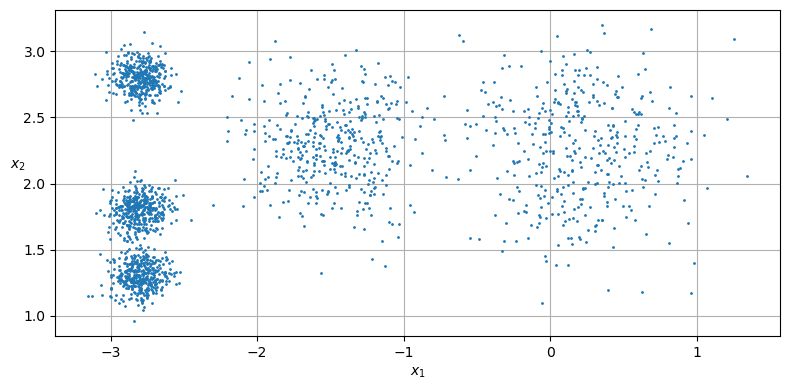

In [9]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
save_fig("blobs_plot")
plt.show()

It is possible to see the labels that were classified using the variable _labels__, or just the prediction:

In [11]:
y_pred

array([0, 0, 4, ..., 3, 1, 0])

In [12]:
kmeans.labels_

array([0, 0, 4, ..., 3, 1, 0])

It is also possible to see the five centroids that the algorithm found:

In [14]:
kmeans.cluster_centers_


array([[-2.80214068,  1.55162671],
       [ 0.08703534,  2.58438091],
       [-1.46869323,  2.28214236],
       [-2.79290307,  2.79641063],
       [ 0.31332823,  1.96822352]])

And make predictons for new values:

In [16]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([4, 4, 3, 3])

#### Decision Boundaries

Plottng the cluster’s decision boundaries, that behave like a **Voronoi tessellation**, where the "X" represents the centroids:

In [19]:
def plot_data(x):
    plt.plot(x[:, 0], x[:, 1], 'k.', markersize=2)
    return None

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=35, linewidths=8, color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color=cross_color, zorder=11, alpha=1)
    return None

def plot_decision_boundaries(clusterer, x, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = x.min(axis=0) - 0.1
    maxs = x.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(x)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    return None

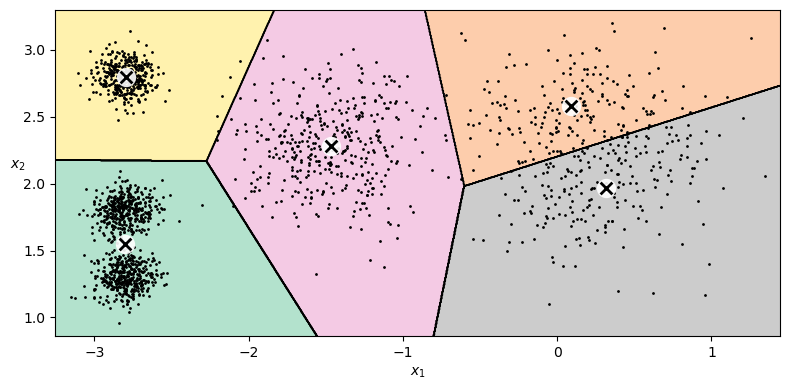

In [20]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()

#### Hard Clustering vs Soft Clustering

- **Hard Clustering**: Each instance is assigned to one cluster;
- **Soft Clustering**: It is given the instances a score per cluster. The score can be the distance between the instance and the centroid or a _similarity score_ (or  _Affinity_), like _Gaussian Radial Basis_

In the `KMeans` class, `transform()` method measures the distance from each instance to every centroid:

In [24]:
kmeans.transform(X_new).round(2)

array([[2.84, 0.59, 1.5 , 2.9 , 0.31],
       [5.82, 2.97, 4.48, 5.85, 2.69],
       [1.46, 3.11, 1.69, 0.29, 3.47],
       [0.97, 3.09, 1.55, 0.36, 3.36]])

#### The k-means algorithm

The K-Means algorithm is one of the fastest clustering algorithms, and also one of the simplest:

1. Initialize **k** centroids randomly, in **k** random instances.
2. Repeat until convergence (i.e., until the centroids stop moving):
3. Assign each instance to the closest centroid.

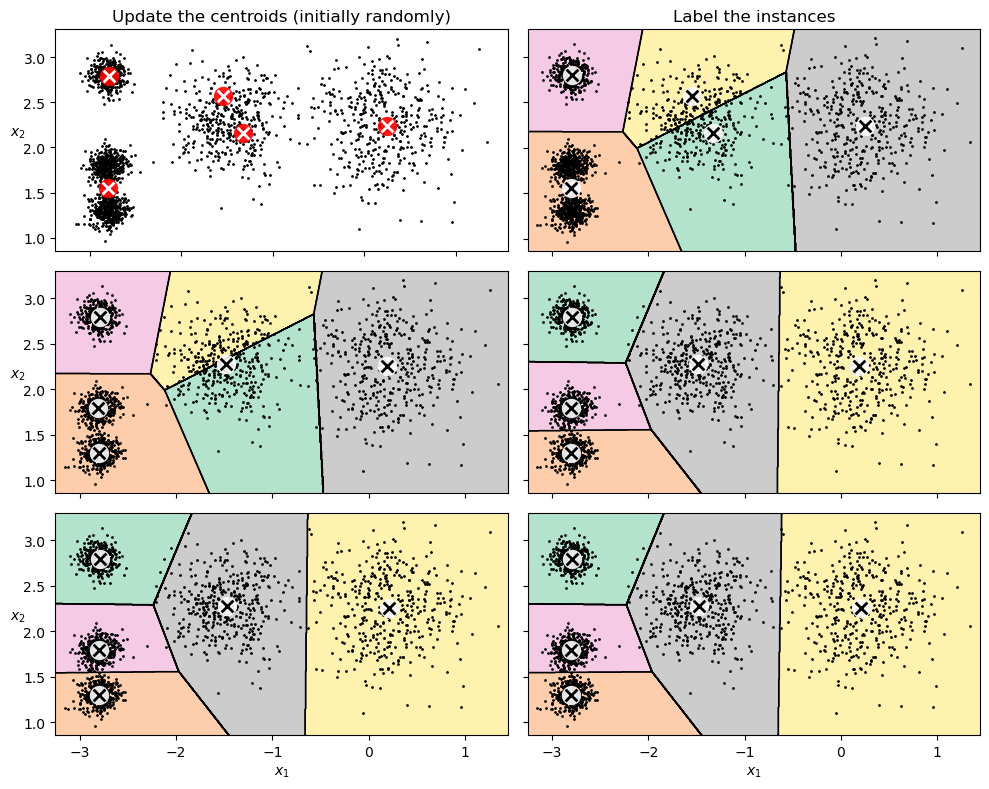

In [27]:
# Need to fix this functions

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=4, max_iter=1,
                      random_state=5)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=4, max_iter=2,
                      random_state=5)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=4, max_iter=3,
                      random_state=5)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)")

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("Label the instances")

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,
                         show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

Although it converges, there are times when it can get stuck in a local minimum. For this, we will see ways to avoid this.

#### Centroid initialization methods

There are 3 most popular methods to select the centroid:

1. Starting with parameters that we know will be good from the `init` hyperparameter:

In [31]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

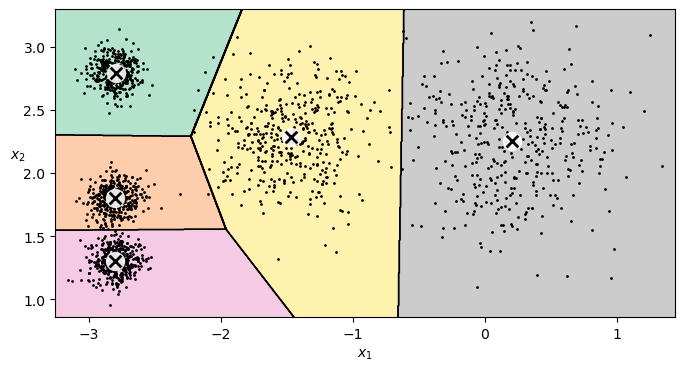

In [32]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

2. Running the algorithm several times and keeping the best solution with the `n_init` hyperparameter

In [34]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                             random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=2)

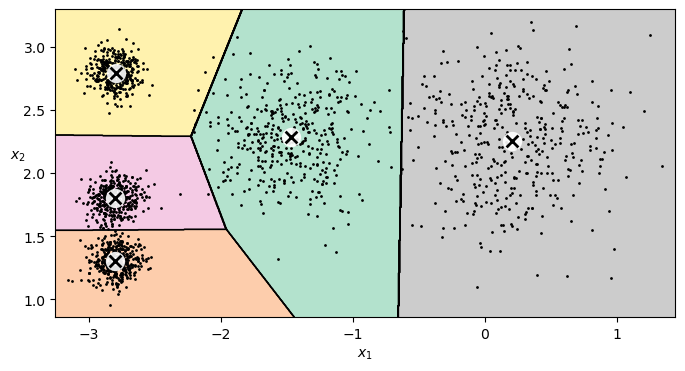

In [35]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

3. Using the _K-means++_ algorithm. `init="k-means++"`

The algorithm operates in the steps of, first, selecting the centroid $c^{(1)}$ in the dataset.
   
After that, select a new centroid $c^{(i)}$ by choosing an instance $x^{(1)}$ through the probability expressed by the equation 
$D(x^{(i)})^{2}/ \sum_{j=1}^{m} D(x^{(j)})^{2}$, where $D(x^{(i)})$is the distance between the instance $x^{(i)}$ and the closest centroid already chosen (in the case in question, it would be $c^{(1)}$)and repeat this step until selecting the k centroids

  Repeat the previous step until all k centroids have been chosen.

<div class="alert alert-block alert-info">
<b>Tip:</b> For all of these options, we need to pay attention to the factor called <b>Inertia</b>. This is given by the sum of the squared distances between the instances and their closest centroids. The lowest the Inertia, the better.
</div>

There's two forms that we can get the inertia. First, using the variable `inertia_`

In [39]:
kmeans.inertia_

211.59853725816836

The other way is using the `score()` from the predictor (the value  is negative because `score()` have to respect the rule that "higher is better").

In [41]:
kmeans.score(X)

-211.59853725816836

#### Accelerated k-means and mini-batch k-means

The **Elkan Algorithm** or **Accelerated Algorithm** is used in data sets with many clusters, avoiding unnecessary distance calculations. It does this through the triangle inequality and controlling lower and upper bounds for the distances between instances and centroids. It is used through the hyperparameter `algorithm = "elkan"`.

The use of **mini-batches** proposed by Schulley uses mini-batches by moving centroids only a little at each iteration, speeding up the algorithm and making it possible to cluster large data sets. It is possible to use it with the `MiniBatchKMeans` class. This method is faster than the others, but usualy have a worse inertia.

In [45]:
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings("ignore")


minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)

In [46]:
minibatch_kmeans.inertia_

211.6589937457431

100/100

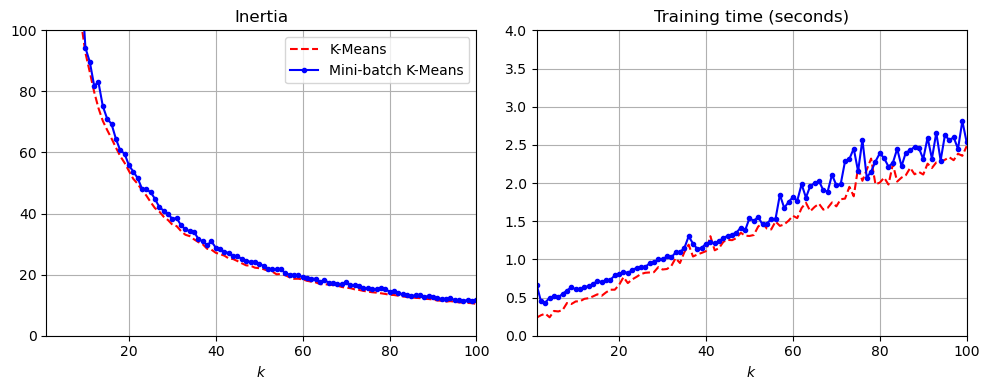

In [47]:
from timeit import timeit

max_k = 100
times = np.empty((max_k, 2))
inertias = np.empty((max_k, 2))
for k in range(1, max_k + 1):
    kmeans_ = KMeans(n_clusters=k, algorithm="lloyd", n_init=10, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, n_init=10, random_state=42)
    print(f"\r{k}/{max_k}", end="")  # \r returns to the start of line
    times[k - 1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k - 1, 1] = timeit("minibatch_kmeans.fit(X)", number=10,
                             globals=globals())
    inertias[k - 1, 0] = kmeans_.inertia_
    inertias[k - 1, 1] = minibatch_kmeans.inertia_

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(range(1, max_k + 1), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Inertia")
plt.legend()
plt.axis([1, max_k, 0, 100])
plt.grid()

plt.subplot(122)
plt.plot(range(1, max_k + 1), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, max_k + 1), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$")
plt.title("Training time (seconds)")
plt.axis([1, max_k, 0, 4])
plt.grid()

save_fig("minibatch_kmeans_vs_kmeans_plot")
plt.show()

#### Finding the optimal number of clusters

A reliable (but computationally more expensive) method is to use **Silhouette Score**, which is defined by the **Silhouette Coefficient** of the instances, as can be seen in the use of the `silhouette_score` class:

In [50]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

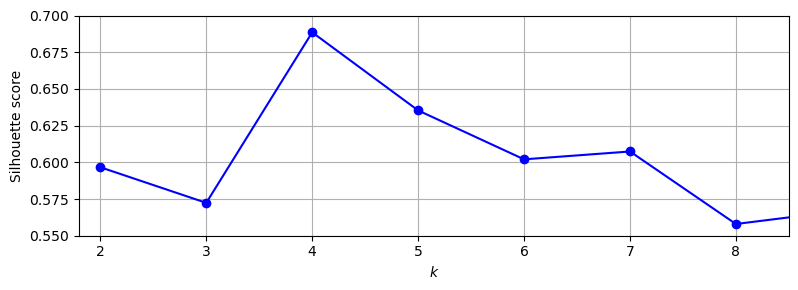

In [63]:
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X) for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
save_fig("silhouette_score_vs_k_plot")
plt.show()

**Silhouette Coefficient** is governed by the equation:

$$
Sillhouete \: \: Coefficient \: \: = \frac{(b-a)}{max(a,b)}
$$

And the results can vary between:

- **Close to +1**: Instance is well allocated within the cluster and far from the others;

- **Close to 0**: Instance close to a cluster boundary;

- **Close to -1**: Instance possibly assigned to the wrong instance.

A better way to visualize the performance of the sillhouetes is the **Silhouette Diagram** graph. The graphs are blade-shaped, where the **height** of the shape indicates the number of instances in this cluster and the **width** represents the average of the coefficients of the instances in the cluster (wider = better).

The vertical line represents the average score of the silhouette. If the instances are to the left of the line, it indicates that there was poor clustering.

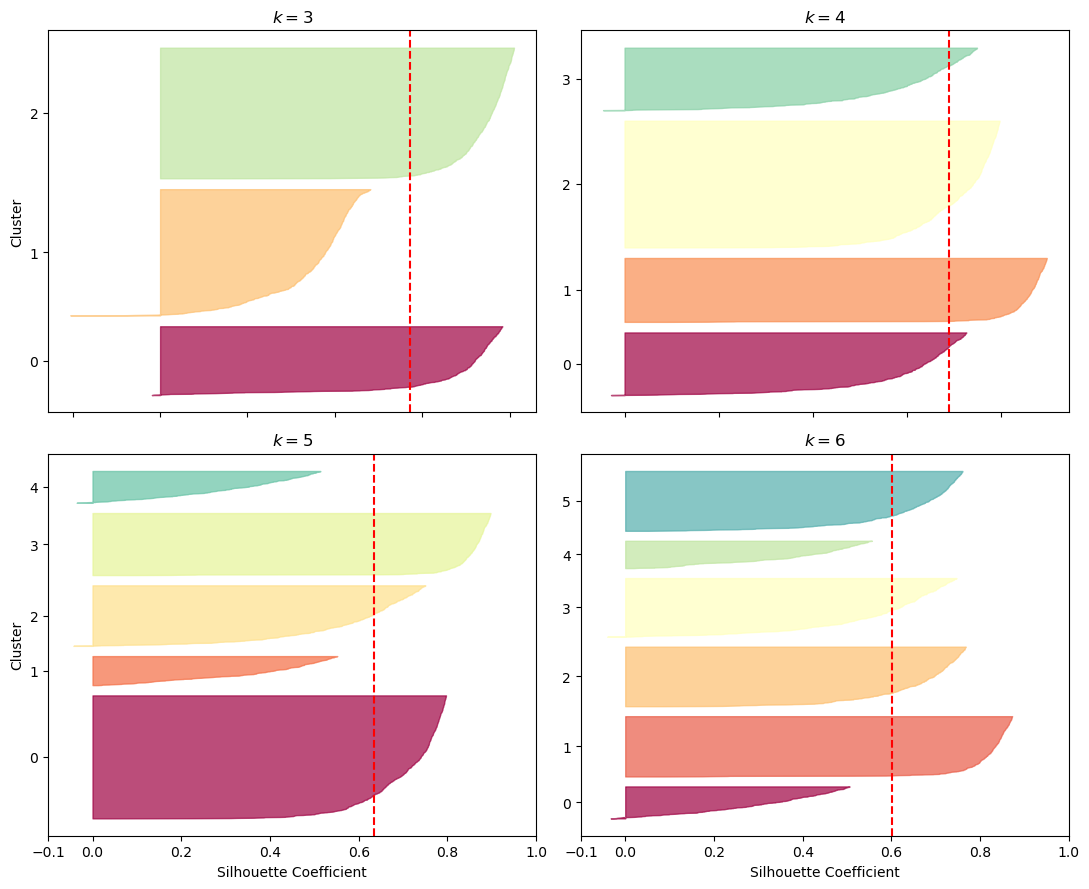

In [65]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

save_fig("silhouette_analysis_plot")
plt.show()

Another way to analyze the number k of clusters is through **Inertia**. However, this method is not very reliable because inertia always decreases as there are more clusters (↑ clusters, ↑ next instances are from the closest centroid, therefore, ↓ Inertia).

<div class="alert alert-block alert-warning">
<b>Warning:</b> Another way to analyze the number k of clusters is through <b>Inertia</b>. However, this method is not very reliable because inertia always decreases as there are more clusters (↑ clusters, ↑ next instances are from the closest centroid, therefore, ↓ Inertia).
</div>

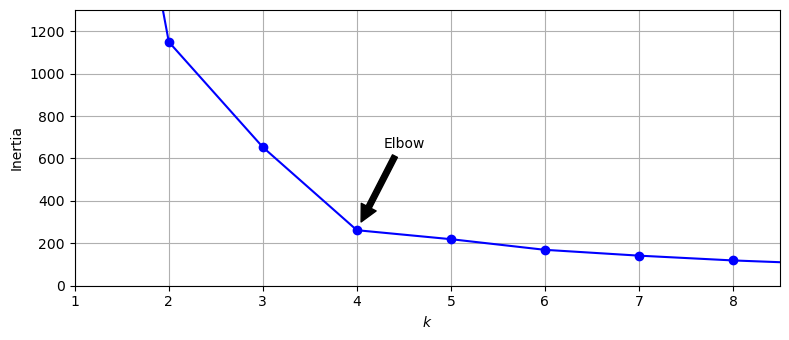

In [67]:
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.annotate("", xy=(4, inertias[3]), xytext=(4.45, 650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(4.5, 650, "Elbow", horizontalalignment="center")
plt.axis([1, 8.5, 0, 1300])
plt.grid()
save_fig("inertia_vs_k_plot")
plt.show()

### Limits of k-means

Although it has several advantages, the k-means algorithm performs poorly when faced with clusters of _different sizes_, _densities_ or _shapes_ that are **not spherical**. An example would be the Gaussian Mixture algorithm, which performs better on elliptical shapes.

### Using Clustering for Image Segmentation

**Image segmentation** consiste em dividir a imagem em diversos segmentos. Dentre as possiblidiades, as principais são:

- **Color Segmentation**: Pixels with the same color are assigned to the same segment. Useful in satellite forest preservation analysis;
- **Semantic Segmentation**: Pixels that are part of the same object are in the same segment. Useful in cars driving to identify signs or pedestrians.
- **Instance Segmentation**: Similar to the previous one, but more specific. It would identify each sign as one and each pedestrian as one.


<div class="alert alert-block alert-info">
<b>Note:</b> Due to the fact that the other features are more commonly used using CNNs (Convoluted Neural Networks) and this is the topic of the next chapter, here it will only be discussed in depth <b>Color Segmentation</b>
</div>

In [69]:
import urllib.request

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)
import PIL

The image `ladybug.png` from the `Pillow` library will be used as an example. The image is a 3D array, where the first dimension is the height, the second the width (number of pixels in the rows and columns) and the third the intensity of the RGB colors. In short, each pixel contains an RGB representation from 0 to 255. Additional channels could represent transparency, or infrared for satellites.

It is possible to reshape the array to obtain a list of RGB colors. The code below demonstrates this being used and applied to 8 clusters. It is important to note that the smaller the number of clusters, the smaller details of the image will go unnoticed by the algorithm.

In [71]:
image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

In [83]:
X = image.reshape(-1, 3) # Reshape array to get list of RGB colors
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(X) # Group colors using k-means with eight clusters 
segmented_img = kmeans.cluster_centers_[kmeans.labels_] # Create array containing cenroid of cluster closest to each pixel (closest color to each instance or pixel)
segmented_img = segmented_img.reshape(image.shape) # Reshape array to original format

Below we can see the influence of color clustering on the image. It is clear that when we use a k value lower than 8, the red color of the ladybug no longer appears due to its low influence on the image as a whole.

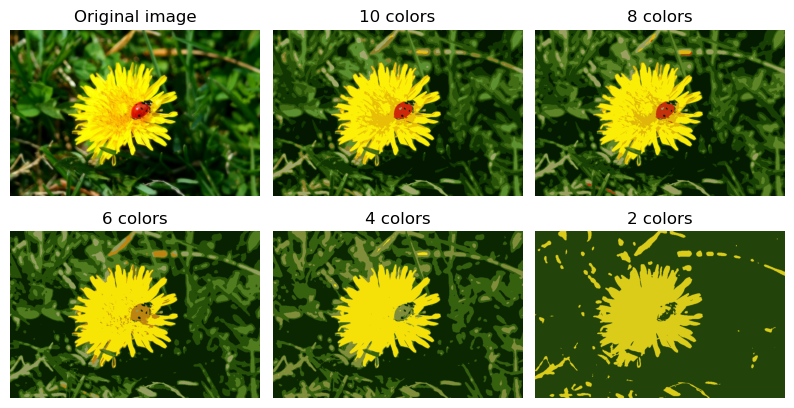

In [99]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

save_fig('image_segmentation_plot', tight_layout=False)
plt.show()

### Using Clustering for Semi-Supervised Learning

A very common use for this type of algorithm is for **Semi-Supervised Learning**. For images where we have a few with labels, and many without, it becomes something very applicable. Below we will see examples using the MNIST dataset:

In [103]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

Considering that we only have 50 instances with labels, we perform a _Logistic Regression_:

In [105]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [116]:
log_reg.score(X_test, y_test)

0.7581863979848866

Using only 50 labels, the classifications had 75% accuracy. Below we will see the value that would be achieved with the complete dataset used:

In [123]:
log_reg_full = LogisticRegression(max_iter=10_000)
log_reg_full.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [125]:
log_reg_full.score(X_test, y_test)

0.9093198992443325

With the entire dataset, the value obtained was 90%, 15% higher than with 50 labels.

In [153]:
X_train.shape

(1400, 64)

One way to obtain better results with fewer labels is to use a technique called **Representative Images**.

First, we use the training set to train 50 clusters. Then, we take the image closest to the centroid of each of these clusters, thus giving a more representative image, and not random as previously done.

In [130]:
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digit_idx]

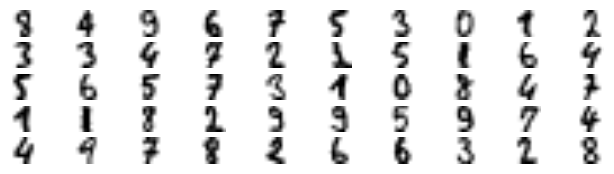

In [132]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_plot", tight_layout=False)
plt.show()

To avoid manually writing down the digits, we use the code below:

In [151]:
y_representative_digits = y_train[representative_digit_idx].copy()

In [163]:
log_reg_rep = LogisticRegression(max_iter=10_000)
log_reg_rep.fit(X_representative_digits, y_representative_digits)

LogisticRegression(max_iter=10000)

As we can see, the result of using _Representative Images_ is much better than using _Random Images_.

In [165]:
log_reg_rep.score(X_test, y_test)

0.8387909319899244

In [171]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [173]:
log_reg_labeled = LogisticRegression(max_iter=10_000)
log_reg_labeled.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=10000)

In [175]:
log_reg_labeled.score(X_test, y_test)

0.8589420654911839

In [185]:
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [187]:
log_reg_labeled_lim = LogisticRegression(max_iter=10_000)
log_reg_labeled_lim.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=10000)

In [189]:
log_reg_labeled_lim.score(X_test, y_test)

0.8564231738035264

In [ ]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

In [ ]:
data_ml = {
    'Logistic_Regression':[logreg_cv.score(X_test,Y_test)],
    'Full_Dataset':[log_reg_full.score(X_test, y_test)],
    'Random_Images':[log_reg.score(X_test, y_test)],
    'Representative_Images':[log_reg_rep.score(X_test, y_test)]
}

df_ml = pd.DataFrame.from_dict(data_ml)
df_ml

### DBSCAN

### Other Clustering Algorithms

Some other algorithms from the Scikit-Learn library are:

- **Agglomerative Clustering**: Hierarchical clustering from the bottom up; it operates from individual sets, and gradually clusters them until a single large cluster is formed. It has a tree-like format. It is useful for clusters of different formats and is flexible in performance, scaling well with large datasets if there is a _connectivity matrix_ (sparse m × m matrix indicating that pairs of instances are neighbors).

- **BIRCH**: Or **Balanced Iterative reducing and Clustering using Hierarchies**, it performs well with large datasets and with a not very large number of features (<20). It can be faster than _batch k-mean_.

- **Mean-Shift**: In this algorithm, a point called _Particle_ is initially defined in each instance, and the local density in the data space is calculated. Then the particle is moved to where the density is concentrated and continues to move until the local intensity peak is reached, forming a cluster. It is capable of forming clusters with different numbers and shapes, uses only one hyperparameter and depends on the local density. It scales poorly with large datasets.

- **Affinity Propagation**: In this algorithm, instances choose another instance (or themselves) to "represent" them, and each instance chosen for this purpose is called _Exemplar_. Each _Exemplar_ and its "voters" form a cluster. It is similar to _K-Mean_, but does not require the number of clusters to be chosen beforehand, operates well with clusters of different sizes and scales poorly with a large dataset.

- **Spectral Clustering**: Explaining it in a simpler way, it uses a similarity matrix between the instances, reduces the dimensionality of the matrix and uses a clustering algorithm on this similarity matrix with reduced dimensionality. It does not work well with clusters of different sizes, but it handles different and irregular shapes well, being able to identify more complex patterns, such as clusters of friends in social networks. It does not scale well with large datasets.

## Gaussian Mixtures

### Using Gaussian Mixtures for Anomaly Detection

### Selecting the Number of Clusters

### Bayesian Gaussian Mixture Models

### Other Algorithms for Anomaly and Novelty Detection

- **Fast-MCD (Minimum Covariance Determinant)**: Model assumes that normal instances (inliners) were generated by a **Single Gaussian Distribution** and that outliers were not generated by it. Useful for identifying outliers and cleaning data sets. Implemented by the `EllipticEnvelope` class;

- **Isolation Forest**: Consists of multiple _Random Forests_ until all instances are isolated. The values ​​with the greatest isolation are considered anomalous. Useful for detecting outliers in high-dimensional sets;

- **Local Outlier Factor (LOF)**: Compares the density of instances around an instance and its neighbors, considering the most isolated anomaly as the anomaly. Useful for detecting outliers;

- **One-Class (SVM)**: As in a kernelized SVM classifier, they separate into two classes after implicitly mapping high-dimensional spaces. Since there is only one class, the inliner instances are considered one class and the anomalies are considered the other. Useful for detecting novelties and performs well in high dimensions, but not in large datasets.

- **PCA/ Dimensional Reduction Techniques with `inverse_transform()`**: When performing the inverse (or reconstruction), it is noticed that the error of a normal instance when reconstructed in comparison to an anomaly is much smaller. Used in anomaly detection.